# Ejercicio 2
Contenido del dataset: Resumen: Datos experimentales utilizados para la clasificación binaria (ocupación de la habitación) de temperatura, humedad, luz y CO2. La ocupación real se obtuvo a partir de imágenes con marca de tiempo que se tomaron cada minuto.
El ejercicio consiste obtener un modelo de clasificación para clasificar en si está ocupada (clase positiva) o no lo está, usando SVM y optimizando con  rejilla (GridSearchCV) los hiperparámetros C y kernel.
El dataset está en formato de texto, pero se puede cargar como archivo csv, y contiene un conjunto de entrenamiento (datatraining.txt) dos conjuntos de test (datatest.txt y datatest2.txt) aunque vamos a usar solo el primero (datatest.txt). Contiene 6 atributos y la clase. Como el primero es la fecha y hora habría que eliminarlo. Los atributos son: fecha, temperatura, humedad, iluminación, CO2, ratio de humedad y etiqueta/clase
*   URL: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip

**Tomando como base el ejemplo6 de los suministrados en clase (apartado de rejilla con SVC)** implementar un clasificador basado en el SVM No lineal (SVC)  que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento para escalar los datos.
*   Una vez escalados los datos, definir la rejilla con los siguientes parámetros: 'C':[0.01,0.1,1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]
*   Entrenar el modelo y mostrar los mejores parámetros.
*   Para los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Implementar un clasificador basado en un árbol de decisión, a partir de los datos ya preprocesados para el clasificador anterior, usando una rejilla con los siguientes parámetros: 'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6] y obtenerPara los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.


In [ ]:
import pandas as pd

In [ ]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
unzip occupancy_data.zip

In [ ]:
occupancy_train = pd.read_csv("/content/datatraining.txt")

In [ ]:
occupancy_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


date was eliminated

In [ ]:
occupancy_test = pd.read_csv("/content/datatest.txt")

In [ ]:
occupancy_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
#Como nos suministran los datos separados en test y entrenamiento, no hay que hacer partición del dataset en test y entrenamiento, como en el ejercicio 1
#Ahora habría la fecha de los conjuntos test y entrenamiento.
#Después habría que separar en los conjuntos de entrenamiento y test, los datos de las etiquetas/clases
#Para estas dos acciones, ver el código suministrado del ejercicio 1.
#Así se obtendrán los conjuntos X_train, X_test, y_train, y_test

In [ ]:
#Una vez obtenidos los conjuntos de test y de entrenamiento, hay que aplicar el escalado con StandarScaler (no vamos a usar pipe).
#Para aplicarlo por ejemplo en X_train --> X_train = StandardScaler().fit_transform(X_train)

In [ ]:
# eliminar dos variables:
occupancy_train.drop("date",axis=1,inplace=True)
occupancy_test.drop("date", axis=1, inplace=True)

In [ ]:
# obtiendo X_train, X_test y_train and y_test
X_train = occupancy_train.drop("Occupancy",axis=1)
X_test =occupancy_test.drop("Occupancy", axis=1)
y_train = occupancy_train["Occupancy"]
y_test = occupancy_test["Occupancy"]

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
X_train.shape

(8143, 5)

In [ ]:
y_train.shape

(8143, 1)

In [ ]:
# Escalar x_train y x_test usando StandardScaler
from sklearn.preprocessing import StandardScaler #Para escalar los datos
X_ss = StandardScaler().fit_transform(X_train)
x_test_ss = StandardScaler().fit_transform(X_test)

In [ ]:
# Iniciar el diccionario de parámetros, el clasificador SVM y la búsqueda en cuadrícula con precisión como métrica de evaluación,
# luego ajustar los datos al modelo.
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = { 'C':[0.01,0.1,1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]}
svc = svm.SVC(random_state=42)
clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=5)
clf.fit(X_ss, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
# obtiendo the best parameters according to the accuracy
clf.best_params_

{'C': 2, 'kernel': 'linear'}

In [ ]:
# usando el mejor modelo para predecir x_test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = clf.predict(x_test_ss)
# calcular la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1665,   28],
       [ 329,  643]])

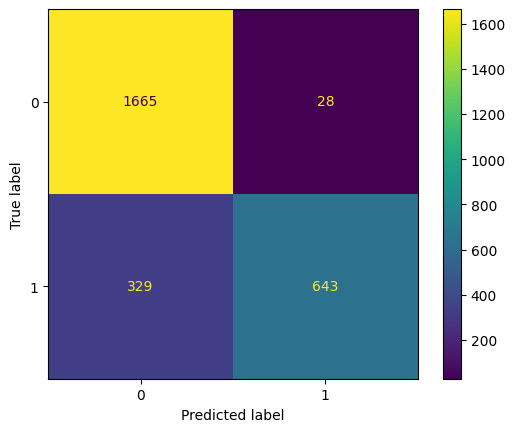

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.8660412757973733, 0.9582712369597616, 0.661522633744856, 0.7827145465611686)

Arbol de Decision

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Parámetros para el optimizador de búsqueda en cuadrícula
param = { 'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6] }
# un clasificador basado en un árbol de decisión
DT = DecisionTreeClassifier(random_state=42)
clfDT = GridSearchCV(DT, param, scoring='accuracy', cv=5)
clfDT.fit(X_ss, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                            14, 15, 16, 17, 18, 19, 20, 21, 22,
                                            23, 24, 25, 26, 27, 28, 29],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='accuracy')

In [ ]:
# Obtener los mejores parámetros
clfDT.best_params_

{'max_leaf_nodes': 3, 'min_samples_split': 2}

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = clfDT.predict(x_test_ss)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1682,   11],
       [ 670,  302]])

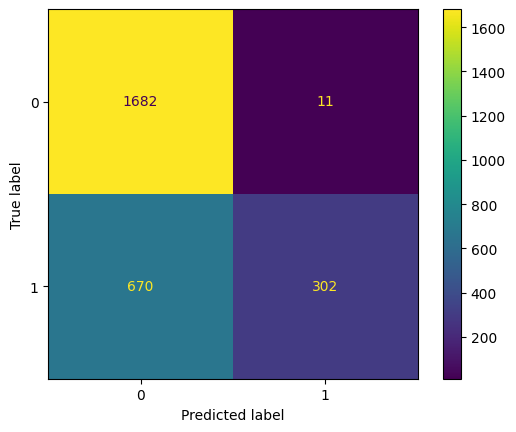

In [ ]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7444652908067543,
 0.9648562300319489,
 0.31069958847736623,
 0.4700389105058365)

# **Resumen:**

Usamos el conjunto de datos de ocupación en este cuaderno para implementar la optimización de hiperparámetros usando GridSearch. Se han utilizado tres clasificadores: Bosque Aleatorio, Árbol de Decisión y Máquinas de Soporte Vectorial (SVM). En cada escenario, utilizamos el mejor modelo para clasificar los datos de prueba y calculamos la matriz de confusión y algunas métricas asociadas. Concluimos el rendimiento superior del SVM optimizado en comparación con el árbol de decisiones.